# Introduction
In this project I'm tasked with identifying and proving which is the "best" neighborhood in Pittsburgh using a data set that's collected from each neighborhood in Pittsburgh. I was originally going to use a metric that collected SNAP data from each neighborhood or a metric that reported landslide prone areas, but I ultimately chose a metric based on the monthly criminal activity in each neighborhood as my group and I decided to chose metrics based on safety.


# Dataset: Monthly Criminal Activity

In [2]:
import pandas as pd

In [3]:
crime = pd.read_csv("/ihome/cmpinf0010_2025f/ajm698/Final-Project-Best-Pittsburgh-Neighborhood-/data/Monthly_Criminal_Activity.csv", low_memory=False)

In [4]:
#cf = crime filter
cf = crime[["Neighborhood", "ReportedMonth", "NIBRS_Offense_Type"]]


In [5]:
#each neighborhood
neighborhoods = crime["Neighborhood"].unique()
neighborhoods_list = []

for neighborhood in neighborhoods:
    if isinstance(neighborhood, str):
        neighborhoods_list.append(neighborhood)

for neighborhood in neighborhoods_list:
    print(neighborhood)


Brookline
Manchester
Point Breeze North
South Side Flats
North Shore
Greenfield
Homewood North
South Side Slopes
Central Business District
East Liberty
North Oakland
Squirrel Hill South
East Allegheny
Strip District
Lincoln–Lemington–Belmar
Shadyside
Carrick
Point Breeze
Morningside
Allentown
Crafton Heights
Mount Washington
Crawford-Roberts
Marshall-Shadeland
Central Oakland
Elliott
Brighton Heights
Central Lawrenceville
Summer Hill
South Oakland
Homewood South
Knoxville
Terrace Village
West Oakland
Fineview
Perry South
Upper Lawrenceville
Bluff
Sheraden
Spring Hill–City View
Bloomfield
Beechview
Squirrel Hill North
Garfield
Banksville
Bon Air
Northview Heights
Overbrook
Larimer
Hazelwood
Friendship
Central Northside
Homewood West
Lower Lawrenceville
East Carnegie
Bedford Dwellings
Lincoln-Lemington-Belmar
New Homestead
Troy Hill
Highland Park
Lincoln Place
Chateau
Polish Hill
Glen Hazel
Hays
California-Kirkbride
East Hills
Middle Hill
Regent Square
Perry North
Stanton Heights
West En

In [6]:
#each offense type
offense_type = crime["NIBRS_Offense_Type"].unique()
offense_type_list = []

for offense in offense_type:
    if isinstance(offense, str):
        offense_type_list.append(offense)

offense_type_list.sort()

for offense in offense_type_list:
    print(offense)


Aggravated Assault
All Other Larceny
All other Offenses
Arson
Assisting or Promoting Prostitution
Bad Checks
Bribery
Burglary/Breaking & Entering
Commercial Sex Acts
Counterfeiting/Forgery
Credit Card/ATM Fraud
Curfew/Loiting/Vagrancy Violations
Destruction/Damage/Vandalism of Property
Disorderly Conduct
Driving Under the Influence
Drug Equipment Violations
Drug/Narcotic Violations
Drunkenness
Embezzlement
Extortion/Blackmail
False Pretenses/Swindle/Confidence Game
Family Offenses, Nonviolent
Forcible Fondling
Forcible Rape
Forcible Sodomy
Hacking/Computer Invasion
Impersonation
Incest
Intimidation
Involuntary Servitude
Kidnapping/Abduction
Liquor Law Violaitons
Motor Vehicle Theft
Murder & Nonnegligent Manslaughter
Negligent Manslaughter
Not NIBRS Reportable
Peeping Tom
Pocket-Picking
Pornography/Obscene Material
Prostitution
Purse-snatching
Robbery
Sexual Assault With An Object
Shoplifting
Simple Assault
Statutory Rape
Stolen Property Offenses
Theft from Building
Theft from Coin-oper

In [7]:
#total crimes each neighborhood has for each month
#avg crimes per month for each neighboorhood
#total crimes per month per neighborhood 
cf = cf.copy()

cf_monthly = cf.groupby(["Neighborhood", "ReportedMonth"])["NIBRS_Offense_Type"].count()
avg_monthly = cf_monthly.groupby("Neighborhood").mean()

In [8]:
#the total crimes each neighborhood has had
#avg crimes for this year for each neighboorhood
cf_years = cf_monthly.groupby("Neighborhood").sum()

In [9]:
#neighborhoods_list = []
ndata = []

for neighborhood in neighborhoods_list:
    ndata.append({"Neighborhood": neighborhood, "Average_Crime_Per_Month": avg_monthly.loc[neighborhood], "Total_Crime_Years": cf_years.loc[neighborhood]})

data = pd.DataFrame(ndata)
data

,Neighborhood,Average_Crime_Per_Month,Total_Crime_Years
0,Brookline,108.166667,1298
1,Manchester,31.083333,373
2,Point Breeze North,40.666667,488
3,South Side Flats,385.166667,4622
4,North Shore,87.250000,1047
...,...,...,...
86,Fairywood,8.916667,107
87,Saint Clair,3.571429,25
88,Swisshelm Park,6.000000,66
89,Chartiers,3.166667,38


In [10]:
lowest5_monthly = data.nsmallest(5, "Average_Crime_Per_Month")[["Neighborhood", "Average_Crime_Per_Month"]]

lowest5monthly = pd.DataFrame({
    "Neighborhoods": lowest5_monthly["Neighborhood"].values,
    "Lowest5_Monthly_Avg": lowest5_monthly["Average_Crime_Per_Month"].values
                          })
lowest5monthly.head()

,Neighborhoods,Lowest5_Monthly_Avg
0,Chartiers,3.166667
1,Ridgemont,3.300000
2,Saint Clair,3.571429
3,New Homestead,5.400000
4,Swisshelm Park,6.000000


In [11]:
lowest5_yearly = data.nsmallest(5, "Total_Crime_Years")[["Neighborhood", "Total_Crime_Years"]]

lowest5year = pd.DataFrame({
    "Neighborhoods": lowest5_yearly["Neighborhood"].values,
    "Lowest5_Trough_Years": lowest5_yearly["Total_Crime_Years"].values
                          })
lowest5year.head()

,Neighborhoods,Lowest5_Trough_Years
0,Saint Clair,25
1,Ridgemont,33
2,Chartiers,38
3,New Homestead,54
4,Swisshelm Park,66


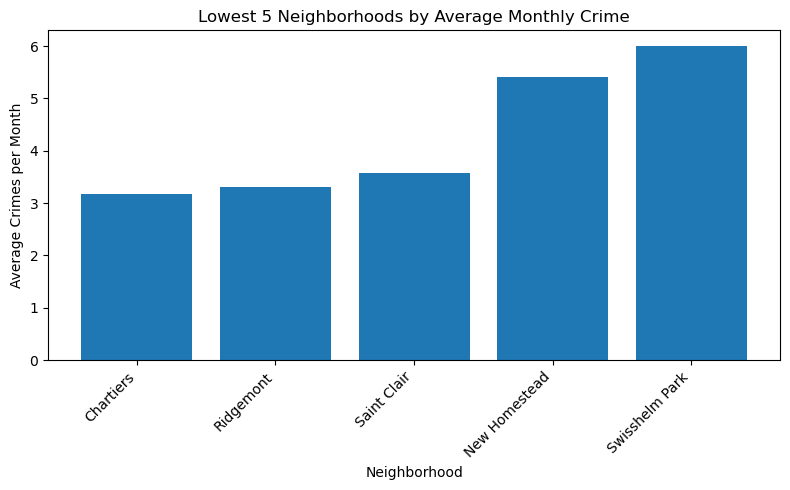

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(lowest5monthly["Neighborhoods"], lowest5monthly["Lowest5_Monthly_Avg"])
plt.title("Lowest 5 Neighborhoods by Average Monthly Crime")
plt.xlabel("Neighborhood")
plt.ylabel("Average Crimes per Month")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

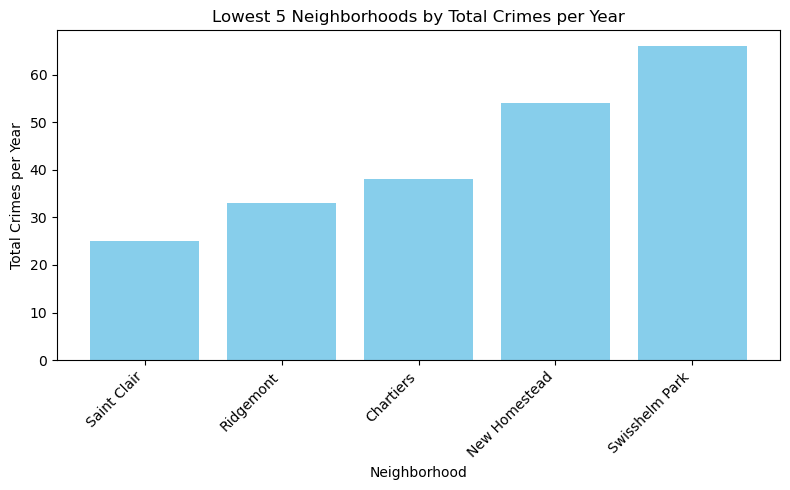

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(lowest5year["Neighborhoods"], lowest5year["Lowest5_Trough_Years"], color="skyblue")
plt.title("Lowest 5 Neighborhoods by Total Crimes per Year")
plt.xlabel("Neighborhood")
plt.ylabel("Total Crimes per Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
